<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/ExtremeEvent_congestion_Interacting_Random_walkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Derivation of occupation probability

---


Consider an undirectional network having N nodes and E edges. Lets consider a walker intially on ith node, then probabality of findig the walker on node j is at time t is given by


$\hspace{5cm}$$P_{ij}(t) = \left( \sum_{j_1}\frac{A_{ij_{1}}}{K_i} \right) \left( \sum_{j_2}
\frac{A_{j_{1}j_{2}}}{K_{j_1}} \right).....\left( \sum_{j_{(t-1)}}\frac{A_{j_{(t-2)}j_{(t-1)}}}{K_{j_{(t-2)}}} \frac{A_{j_{(t-1)}j}}{K_{j_{(t-1)}}}\right),  K_i $ is degree of ith node and A is adjacency matrix.

Similarly, we can have

$\hspace{5cm}$$P_{ji}(t) = \left( \sum_{j_1}\frac{A_{jj_{1}}}{K_j} \right) \left( \sum_{j_2}
\frac{A_{j_{1}j_{2}}}{K_{j_1}} \right).....\left( \sum_{j_{(t-1)}}\frac{A_{j_{(t-2)}j_{(t-1)}}}{K_{j_{(t-2)}}} \frac{A_{j_{(t-1)}i}}{K_{j_{(t-1)}}}\right)$

Since, for a undirectional network we have symmetric adjacency matrix

$\hspace{5cm}$ $\Rightarrow$ $A_{j_{(t-1)}i}\equiv A_{ij_{1}}$ and $A_{jj_{1}}\equiv A_{j_{(t-1)}j}$

we have

$\hspace{5cm}$$\Rightarrow$ $K_jP_{ij}(t) = K_iP_{ji}(t)$

Under the $\lim_{t\to∞}$ initial position becomes irrelevant

$\hspace{5cm} \Rightarrow \lim_{t \to \infty}P_{ij}(t) → P_j^{∞} $

so we can write $\hspace{2cm}$$\Rightarrow$ $\begin{equation}K_jP_{ij}^{∞} = K_iP_{ji}^{∞}\end{equation}$    
Applying normalization condition $\hspace{1cm}$$\sum_{i}$ $P_i^{∞}=1$

$\hspace{5cm} \sum_iK_iP_j^{∞}=\sum_iK_jP_i^{\infty}$

$\hspace{5cm} P_j^{∞}\sum_iK_i=K_j\sum_iP_i^{\infty}\Rightarrow P_j^{∞}=\frac{K_j}{\sum_iK_i} \Rightarrow P_j^{∞}=\frac{K_j}{2E}$

Reference:[Random Walks on Complex Networks](https://arxiv.org/pdf/cond-mat/0307719.pdf)


##Generating a Graph

In [ ]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def adjacency_list_nodeDegree_osmnxG(G,nodes):
  adjacency_list={}
  G_unD=nx.to_undirected(G)
  for i in range(nodes):
     k=[]
     for j in G_unD.neighbors(i):
         if i!=j:
           k.append(j)
     adjacency_list[i]=k
  node_Degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
  return adjacency_list,node_Degree_dict

In [ ]:
s="My name is {fname}, I'm {age}".format(fname = "John", age = 36)
print(s)

My name is John, I'm 36


In [ ]:
nodes=9
G_nx=nx.barabasi_albert_graph(nodes,m=2,seed=2)
Edges=G_nx.number_of_edges()
adjacency_list,node_Degree_dict=adjacency_list_nodeDegree(G_nx,nodes)
print("Graph has {N} nodes and {E} edges".format(N = nodes,  E=Edges))

Graph has 9 nodes and 14 edges


##Computing occupation probability using formula
$\hspace{5cm}  P_j^{∞}=\frac{K_j}{2E}$

In [ ]:
occpation_prob_Th={node:np.round(node_Degree_dict[node]/(2*Edges),2)for node in node_Degree_dict }
occpation_prob_Th

{0: 0.25,
 1: 0.21,
 2: 0.04,
 3: 0.11,
 4: 0.07,
 5: 0.07,
 6: 0.11,
 7: 0.07,
 8: 0.07}

##Computing occupation probability from simulation

In [ ]:
def next_pos(adjacency_list,pos):
    neig=[n for n in adjacency_list[pos]]
    return np.random.choice(neig)
Time=1000000
Time_series=np.zeros((Time))
Time_series[0]=np.random.randint(0,nodes,1)
for i in range(Time-1):
    Time_series[i+1]=next_pos(adjacency_list,Time_series[i])
occupation_num={}
for node in range(nodes):
   arr=np.where(Time_series==node,1,0)
   occupation_num[node]=sum(arr)

NameError: ignored

In [ ]:
occupation_prob={}
for node in range(nodes):
   arr=np.where(Time_series==node,1,0)
   occupation_prob[node]=np.round(sum(arr)/Time,2)


In [ ]:
occupation_prob

{0: 0.25,
 1: 0.21,
 2: 0.04,
 3: 0.11,
 4: 0.07,
 5: 0.07,
 6: 0.11,
 7: 0.07,
 8: 0.07}

#Extreme Event and Exploration of Congestion phenomenon on a Complex Network in a model of Intereacting Random Walkers

##Abstract
Random walks are the simplest way to explore or search a graph and have revealed a very useful tool to
investigate and characterize the structural properties of complex networks from the real world. For instance, they
have been used to identify the modules of a given network, its most central nodes and paths, or to determine
the typical times to reach a target. Although various types of random walks whose motion is biased on node
properties, such as the degree, have been proposed, which are still amenable to analytical solution, most if not all
of them rely on the assumption of linearity and independence of the walkers. In this work we introduce a class
of nonlinear stochastic processes describing a system of interacting random walkers moving over networks with
finite node capacities. The transition probabilities that rule the motion of the walkers in our model are modulated
by nonlinear functions of the available space at the destination node, with a bias parameter that allows to tune
the tendency of the walkers to avoid nodes occupied by other walkers. First, we derive the master equation
governing the dynamics of the system, and we determine an analytical expression for the occupation probability
of the walkers at equilibrium in the most general case and under different level of network congestions. Then we
study different types of synthetic and real-world networks, presenting numerical and analytical results for the
entropy rate, a proxy for the network exploration capacities of the walkers. We find that, for each level of the
nonlinear bias, there is an optimal crowding that maximizes the entropy rate in a given network topology. The
analysis suggests that a large fraction of real-world networks are organized in such a way as to favor exploration
under congested conditions. Our work provides a general and versatile framework to model nonlinear stochastic
processes whose transition probabilities vary in time depending on the current state of the system
##Model
Consider a set of interacting agents (walkers) moving on
an undirected network with N nodes, each endowed with a
finite carrying capacity. The architecture of the network is described in
terms of the binary adjacency matrix A = {$a_{ij}$}, with $a_{ij}$ = 1
if there is a link connecting nodes i and j, while $a_{ij}$ = 0
otherwise. At each time t, the state of the system (our set
of walkers) is specified by the vector m = $(m_1,..., m_N )$,
where $0  \leq m_i \leq M$ is the number of agents that belong to
node i, at time t. The total number of walkers in the network
is fixed in time and is a tunable parameter of the model.
We can control it by introducing the average node crowding
$\beta = \frac{1}{N} \sum_{i=1}^{N}\frac{m_i}{M}$. By definition, β ∈ (0, 1] quantifies the
average node congestion, with β → 0 corresponding to the
idealized diluted setting. Hence, we can tune the total number
of walkers in the network, βMN, by independently changing
M and β. Agents perform a biased random-walk hopping
between neighboring nodes, provided there is enough space at
the arriving destination. The motion
of the agents is not biased on the topological properties of
the underlying graph but on the positions of the other agents
in the network. More specifically, the bias results in two distinct contributions, respectively representing the willingness
to leave a node i, and the attractiveness of the target node
j. The first component is a function, $f(x_i)$, of the density
$x_i = \frac{m_i}{M}$ on node i. The second term is made to depend
on the available space $1 − x_j = \frac{(M − m_j)}{M}$ at node j, as
$g(x_j) ≡ ĝ(1 − x_j)$. As a natural constraint, we require that
f (x) vanishes at zero, i.e., f (0) = 0, since no hops can take
place from an empty node. Further, we assume that f (·) is a
nondecreasing nonlinear function of x, a choice that amounts
to modeling antisocial reactions of the walkers to enhanced
crowded conditions.
The standard unconstrained random walk is
eventually recovered when setting f (x) = x and g(x) = 1 for
all x. The finite carrying capacity signifies that no transition
toward node j can take place, if $x_j = 1$, namely if the arrival
node is fully packed. We hence require the self-consistent
condition $g(1) ≡ ĝ(0) = 0$. Any possible choice of f (x) and
g(x) fulfilling the above prescription is in principle possible.
so, transistion probability reads
$T_{ij} ∝ \frac{A_{ij}}{K_i}f(x_i)g(x_j),\hspace{0.5cm} f(x)=x^α, \alpha>0 $     and  $ g(x)=(1-x)^σ, \sigma>0$

For $\sigma=0$ this led to standard random walk.
At a given time only a walker can hop from a given node to one
of its neighbors, the states m take the form mj = (..., m_i ±
1,..., m_j ∓ 1,... ) for all j with a_{ij} = 1.$
Reference:[Nonlinear walkers and efficient exploration of congested networks
](https://journals.aps.org/prresearch/pdf/10.1103/PhysRevResearch.2.033012)

#Defining function for plotting work

In [ ]:
def scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker="o"):
  plt.scatter(xarr,yarr,s=dotsize, c=None, marker=None, cmap=None, norm=None,
  vmin=None, vmax=None, alpha=opacity, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  #plt.plot(xarr,yarr,label=labels,ls=":")
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
def Box_Plot(xarr,xlabel,ylabel,title,label):
  plt.title(title)
  plt.boxplot(xarr,showmeans=True,  labels=label,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.grid()
def HistoGram(array,bins,normalized,width,xlabel,ylabel,alingm,title,fsize):
  fig=plt.figure(figsize=fsize)
  plt.hist(array, bins=bins, range=None, density=normalized, weights=None, cumulative=False,
  bottom=None, histtype='bar', align=alingm, orientation='vertical', rwidth=width,
  log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
def XY_plotting(x,y,xlabel,ylabel,title,linestyle,linewidth,color):
  plt.plot(x,y,ls=linestyle,lw=linewidth,c=color)
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
def plotting_DTRW_timeSeries(degree,TimeS_dict,node,font_dic):
  node_time=TimeS_dict[node]
  walkers=np.array(node_time)
  #print(l.shape)
  time=np.arange(0,len(walkers))
  plt.ylim(-0.2,max(walkers)+5)
  plt.scatter(time,walkers,s=3,c=None, marker=None, cmap=None,
              norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
  plt.xlabel("Time(s)",fontdict=font_dic)
  plt.ylabel("Number of Walkers",fontdict=font_dic)
  plt.title("Discrete Time Random walk Time Series, k = "+str(degree),fontdict=font_dic)
  #print("total numbers of walkers % passes in time %"%(sum(l[::,0]),max(l[::,1])))
  #plt.yticks([i for i in range(m.ceil(max(l[::,1])))])
  #print(l)
  plt.subplots_adjust(left=0.15)
  plt.show()
  plt.title('Box plot')
  plt.boxplot(walkers,showmeans=True,  labels=None,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel("Number of walkers",fontdict=font)
  plt.grid()
  plt.show()

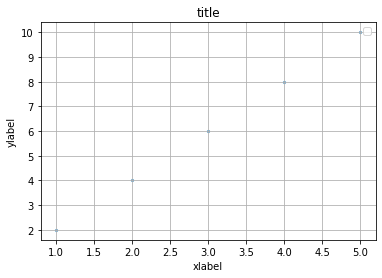

In [ ]:
scatter_Plot([1,2,3,4,5],[2,4,6,8,10],"xlabel","ylabel","title",dotsize=5,opacity=0.6,marker="o")
plt.savefig("sactter.png")

#Defining function for writing and reading data from a binary file

In [ ]:
def storeData(db,file_name):
    # Its important to use binary mode
    dbfile = open(file_name, 'wb')
    # source, destination
    pickle.dump(db, dbfile)
    dbfile.close()
def loadData(file_name):
    # for reading also binary mode is important
    dbfile = open(file_name, 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db

#Defining function for curve fitting

In [ ]:
def objective(x, a, b,c):
    return (a * x**b) + c
def curve_fitting(xx,yy):
  x=xx
  y=yy
  # curve fit
  popt, _ = curve_fit(objective, x, y)
  # summarize the parameter values
  a, b, c= popt
  # plot input vs output
  plt.scatter(x, y)
  # define a sequence of inputs between the smallest and largest known inputs
  #x_line = np.arange(min(x), max(x), 1)
  # calculate the output for the range
  #a,b,c=np.round(a),np.round(b),np.round(c)
  y_line = objective(x, a, b,c)
  print("scaling=",a,"exponent=",b,"shifting=",c)
  # create a line plot for the mapping function
  label=r'$ax^b +c$'+'a= '+str(a)+'b='+str(b)+'c='+str(c)
  plt.plot(x, y_line, '--', color='red')
  plt.show()

#Functions defined for categorizing nodes of same degree

In [ ]:
def plotting_degree_distribution(nodes_degrees):
  nodes_degreewiseFrequency=[]
  for i in nodes_degrees:
   nodes_degreewiseFrequency.append([i[0],len(i[1])])
  nodes_degreewiseFrequency=np.array(nodes_degreewiseFrequency)
  fig=plt.figure(figsize=(10,5))
  plt.bar(nodes_degreewiseFrequency[::,0],nodes_degreewiseFrequency[::,1])
  plt.xlabel("Degrees")
  plt.ylabel("Frequency")
  plt.title("Degree Distribution")
  #plt.xticks([i for i in range(5,130,5)])
def nodes_with_same_Degree(node_Degree_dict):
  Degrees=list(set(node_Degree_dict.values()))
  nodes_degree=[]
  for i in Degrees:
    x=[]
    for j,k in node_Degree_dict.items():
      if i==k:
         x.append(j)
    nodes_degree.append([i,x])
  return nodes_degree

In [ ]:
def function_f(m,M,alpha):
  x=m/M #simple function f(x)=x
  return x**alpha
def function_g(m,M,sigma):
  x=1-(m/M)
  return (x)**sigma
def next_pos(adjacency_list,pos,walker_number_nodewise,node_capcity_nodewise,sigma):
  neig=[n for n in adjacency_list[pos]]
  #print(neig)
  degree=len(neig)
  #Deg_arr=np.array([G.degree(i) for i in neig],dtype=float)
  occp_number=[walker_number_nodewise[i] for i in neig]
  node_capacity=[node_capcity_nodewise[i] for i in neig]
  prob=np.array([(function_g(i,j,sigma)) for i,j in zip(occp_number,node_capacity)],dtype=float)
  if sum(prob)==0:
    return -1
  else:
    norm_prob=[j/sum(prob) for j in prob]
    next_pos=np.random.choice(neig,size=None, replace=True, p=norm_prob)
  return next_pos
def mean_std_walkers_nodewise(time_series_each_node,nodes):
  dic_mean_walkers={}
  dic_std_walkers={}
  for node in range(nodes):
    new_array=np.array(time_series_each_node[node])
    dic_mean_walkers[node]=np.mean(np.array([i for i in new_array ]))
    dic_std_walkers[node]=np.std(np.array([i for i in new_array]))
  return dic_mean_walkers,dic_std_walkers

#----------------------------------------------------------------------------------------------------------------
def walkers_statistic_degreewise(nodes_degrees,dic_mean_walkers ,dic_std_walkers):
  dic_meanW_PER_node_degreewise={}
  dic_stdW_PER_node_degreewise={}
  for nodes in nodes_degrees:
    deg=nodes[0]
    sameDeg_nodes=nodes[1]
    dic_meanW_PER_node_degreewise[deg]=[dic_mean_walkers[n] for n in sameDeg_nodes ]
    dic_stdW_PER_node_degreewise[deg]=[dic_std_walkers[n] for n in sameDeg_nodes]
  Average_walk_degreewise=np.array([[i,np.mean(np.array(dic_meanW_PER_node_degreewise[i]))] for i in dic_meanW_PER_node_degreewise])
  Std_walk_degreewise=np.array([[j,np.mean(np.array(dic_stdW_PER_node_degreewise[j]))] for j in dic_stdW_PER_node_degreewise])
  return Average_walk_degreewise,Std_walk_degreewise
#Extreme event probability calculation
def ExtremeEventProb(Nodes,nodes_degrees,Scaling_factor,time_series_each_node,dic_mean_walkers,dic_std_walkers):
  Extreme_event_nodewise={}
  thresh_hold_Arr={}
  for node in range(Nodes):
    #print(node)
    walkers_array=np.array(time_series_each_node[node])
    #print(walkers_array)
    threshold=dic_mean_walkers[node]+Scaling_factor*dic_std_walkers[node]
    #print(threshold)
    thresh_hold_Arr[node]=threshold
    Extreme_event_nodewise[node]=np.count_nonzero((np.where( walkers_array>threshold, 1,0)))/float(np.size(walkers_array))
  Extreme_event_prob_degreewise={}
  for i in nodes_degrees:
     Extreme_event_prob_degreewise[i[0]]=np.mean(np.array([Extreme_event_nodewise[j] for j in i[1]]))
  return thresh_hold_Arr,Extreme_event_nodewise,Extreme_event_prob_degreewise

In [ ]:
nodes=1000
#G=nx.barabasi_albert_graph(nodes,m=2,seed=2)
G=nx.dual_barabasi_albert_graph(nodes,1,2, 0.6, seed=3, initial_graph=None)

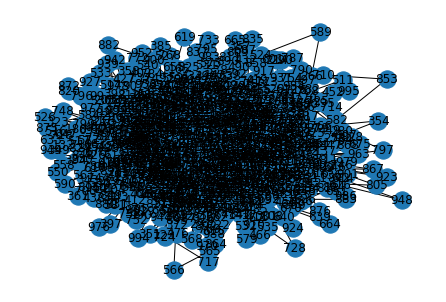

In [ ]:
nx.draw(G,with_labels=True)

In [ ]:
adjacency_list,node_Degree_dict=adjacency_list_nodeDegree(G,nodes)

In [ ]:
adjacency_list=loadData("/content/drive/MyDrive/MS_thesis_work/adjacency_list_Mumbai_")
node_Degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
nodes=len(adjacency_list.keys())

In [ ]:
max(node_Degree_dict.keys())

1070

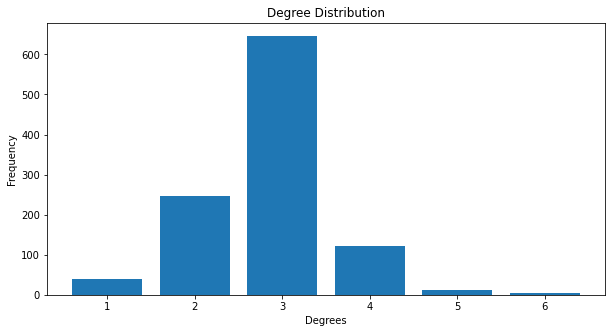

In [ ]:
Nodes_with_Degree=nodes_with_same_Degree(node_Degree_dict)
plotting_degree_distribution(Nodes_with_Degree)

#Distributing walkers nodeswise

##Distributing walkers randomly

In [ ]:
np.random.seed(2)
node_capacity={}
walker_number_nodewise={}
for i in range(nodes):
  node_capacity[i]=30
  walker_number_nodewise[i]=np.random.randint(0,31)
total_num_walkers=sum([walker_number_nodewise[i] for i in walker_number_nodewise])
total_num_walkers

16394

In [ ]:
total_num_walkers=sum([walker_number_nodewise[i] for i in walker_number_nodewise])
total_num_walkers

16394

In [ ]:
walker_number_nodewise

##Distributing walkers degreewise

In [ ]:
walker_number_nodewise={}
for i in range(nodes):
  node_capacity[i]=120
  walker_number_nodewise[i]=node_Degree_dict[i]
total_num_walkers=sum([walker_number_nodewise[i] for i in walker_number_nodewise])
total_num_walkers

6352

##Degree-wise capacity of nodes
Here, capacity of nodes depends on its degree.

$\hspace{5cm}C_i = 2a_0k_i$

In [ ]:
walker_number_nodewise={}
node_capacity={}
for i in range(nodes):
  node_capacity[i]=2*5*node_Degree_dict[i]
  walker_number_nodewise[i]=5*node_Degree_dict[i]
total_num_walkers=sum([walker_number_nodewise[i] for i in walker_number_nodewise])
total_num_walkers

15220

In [ ]:
TimeSeries={}
for node in range(nodes):
    TimeSeries[node]=[walker_number_nodewise[node]]
for time in range(100000):
   #print("Time=",time)
   for node in range(nodes):
     #print("current node",node)
     if walker_number_nodewise[node]>0:
      rnum=np.random.uniform(0,1)
      if rnum<=function_f(walker_number_nodewise[node],node_capacity[node],0):
         next_loc=next_pos(adjacency_list,node,walker_number_nodewise,node_capacity,0)
      else:
         continue
      #print("choosen node",next_loc)
      if next_loc!=-1:
         walker_number_nodewise[next_loc]= walker_number_nodewise[next_loc]+1
         walker_number_nodewise[node]= walker_number_nodewise[node]-1
         #print("walker transfered from",node,next_loc)
      else:pass
         #print("All neighbouring nodes congested")
     else:
       #print("Node is empty",node)
       continue
   for node in range(nodes):
        TimeSeries[node].append(walker_number_nodewise[node])

In [ ]:
 len(TimeSeries[0])

100001

In [ ]:
file_name="/content/drive/MyDrive/MS_thesis_work/Interacting_walkers/I_DTRW_sig_0_alp_0_NodeCapcity_30_randDist_16394_walkers_1070_nodes_mumbai_graph_100000s"
storeData(TimeSeries,file_name)

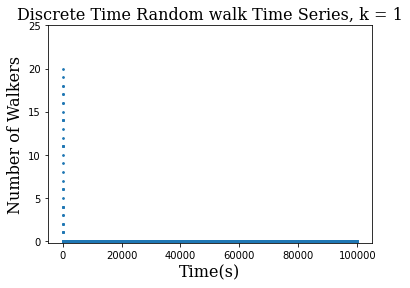

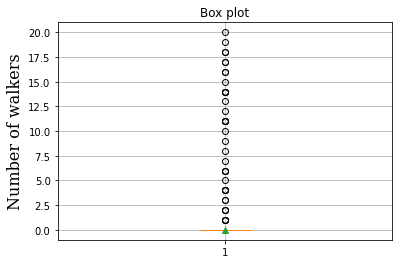

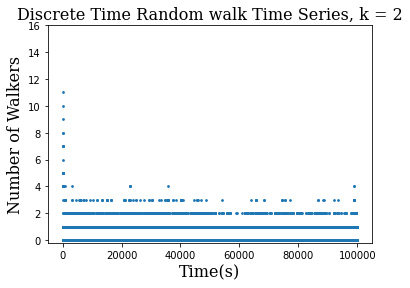

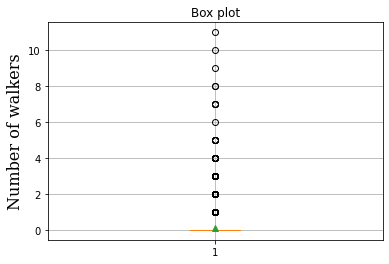

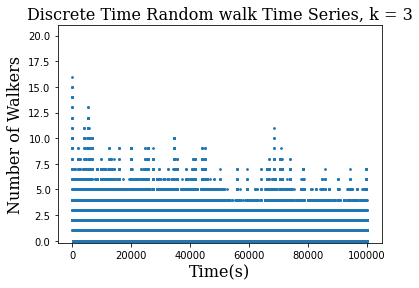

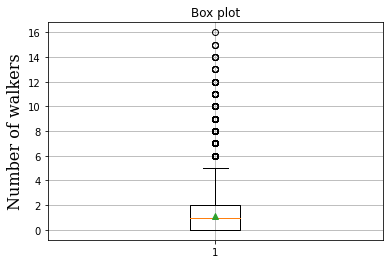

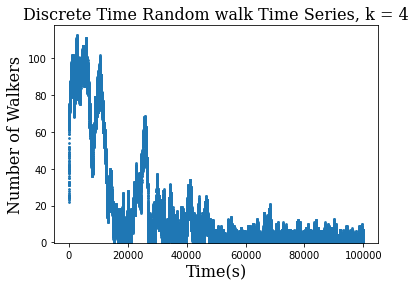

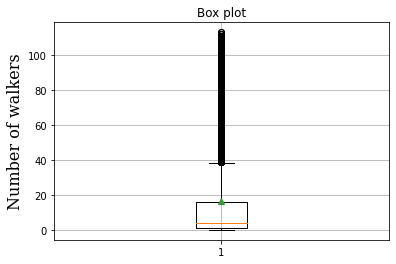

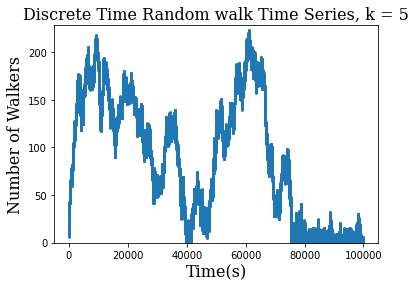

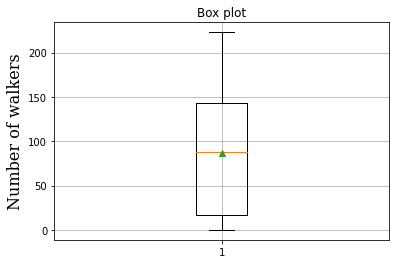

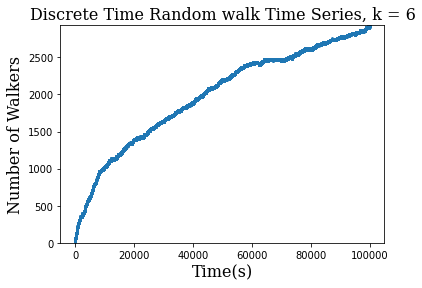

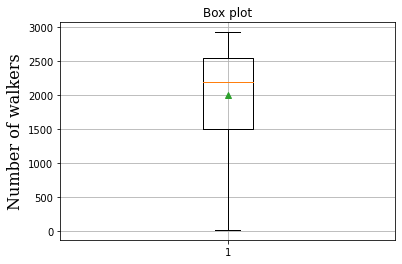

In [ ]:
for i in Nodes_with_Degree:
  plotting_DTRW_timeSeries(i[0],TimeSeries,i[1][1])

In [ ]:
max(TimeSeries[61])

55

In [ ]:
Nodes_with_Degree

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([584470, 585839, 587407, 589101, 590826, 592757, 594905, 597214,
        599681, 602305, 605086, 602305, 599681, 597214, 594905, 592757,
        590826, 589101, 587407, 585839, 584470]),
 <matplotlib.lines.Line2D at 0x7f69ea3370d0>)

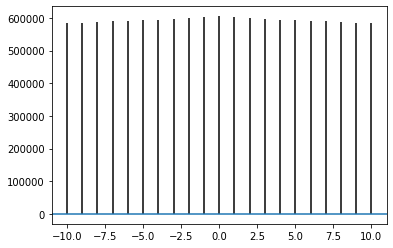

In [ ]:
x=np.array(TimeSeries[1])
plt.acorr(x,normed=False)

#Computing average and standard deviation of walkers for each node

In [ ]:
dic_mean_walkers ,dic_std_walkers=mean_std_walkers_nodewise(TimeSeries,nodes)

##Distribution of Average numbers of walkers computed for all nodes

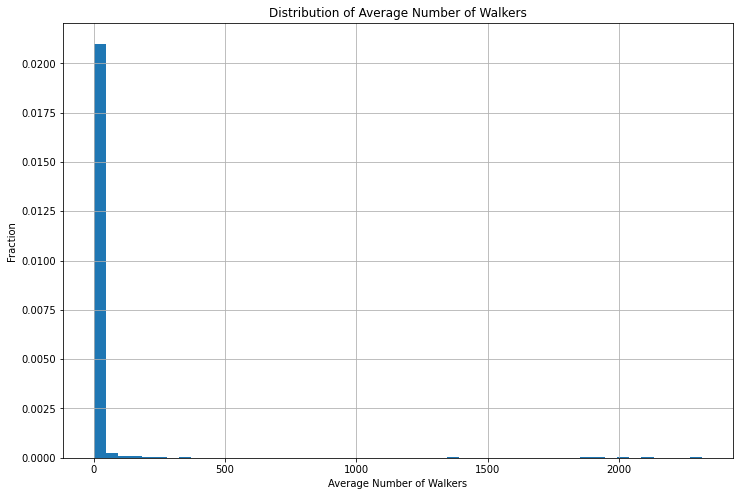

In [ ]:
mean_walkers =np.array([dic_mean_walkers[i] for i in dic_mean_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=50
fsize=(12,8)
xlabel,ylabel,title="Average Number of Walkers","Fraction","Distribution of Average Number of Walkers"
HistoGram(mean_walkers ,bins,True,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Standard deviation of numbers of walkers computed for all nodes

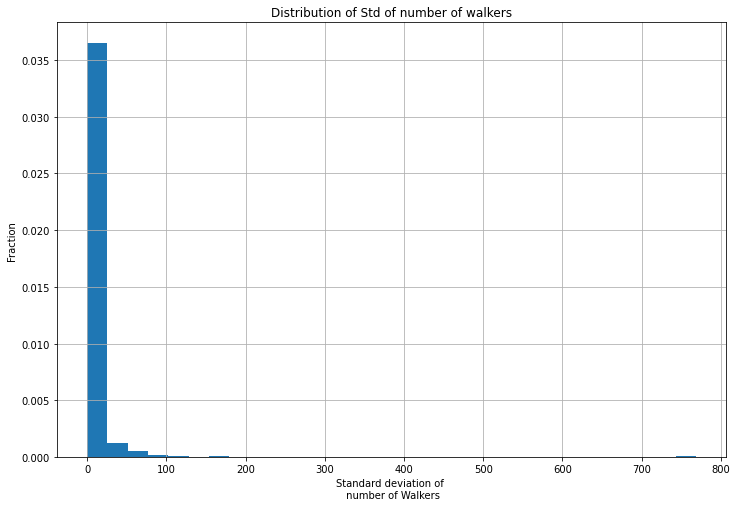

In [ ]:
std_walkers =np.array([dic_std_walkers[i] for i in dic_std_walkers])
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=30
fsize=(12,8)
xlabel,ylabel,title="Standard deviation of \n number of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(std_walkers,bins,True,1,xlabel,ylabel,'mid',title,fsize)

#Computing average and standard deviation of walkers degreewise

In [ ]:
Average_walk_degreewise,Std_walk_degreewise=walkers_statistic_degreewise(Nodes_with_Degree,dic_mean_walkers,dic_std_walkers)

##Distribution of Average numbers of walkers (Computed degreewise)
Here, I am plotting the distribution of numbers of walkers average over degree of nodes

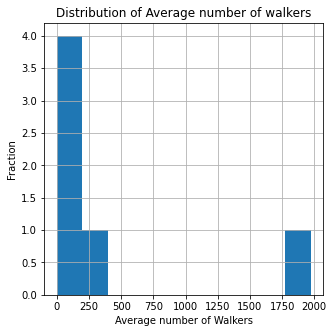

In [ ]:
Avg_walkers =np.array(Average_walk_degreewise)
Avg_walkers_only=Avg_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=10
fsize=(5,5)
xlabel,ylabel,title="Average number of Walkers","Fraction","Distribution of Average number of walkers"
HistoGram(Avg_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##**Variation of average number of walkers with degree of nodes**

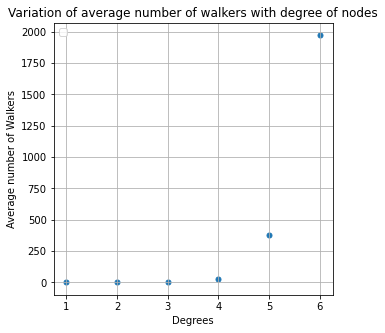

In [ ]:
xarr,yarr=Avg_walkers[::,0],Avg_walkers[::,1]
fig=plt.figure(figsize=(5,5))
xlabel="Degrees"
ylabel="Average number of Walkers"
title="Variation of average number of walkers with degree of nodes"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=1,marker="o")

##Distribution of standard deviation of numbers of walkers(computed degreewise)
Here, I am plotting the distribution of numbers of walkers average over degree of nodes.

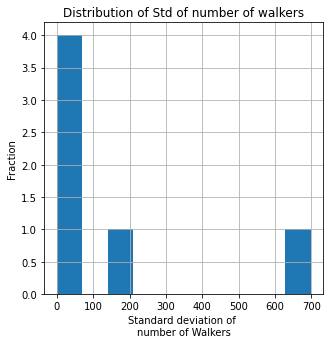

In [ ]:
Std_walkers =np.array(Std_walk_degreewise)
Std_walkers_only=Std_walkers[::,1]
#bins=np.array([i for i in range(int(np.min(walkers_arr)),int(np.max(walkers_arr))+2,1)])
bins=10
fsize=(5,5)
xlabel,ylabel,title="Standard deviation of \nnumber of Walkers","Fraction","Distribution of Std of number of walkers"
HistoGram(Std_walkers_only,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##**Variation of Std of number of walkers with degree of nodes**

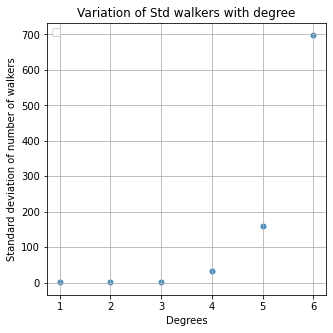

In [ ]:
xarr,yarr=Std_walkers[::,0],Std_walkers[::,1]
fig=plt.figure(figsize=(5,5))
xlabel="Degrees"
ylabel="Standard deviation of number of walkers"
title="Variation of Std walkers with degree"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=0.8,marker="o")

##**Variation of Average number of walkers with standard deviation**

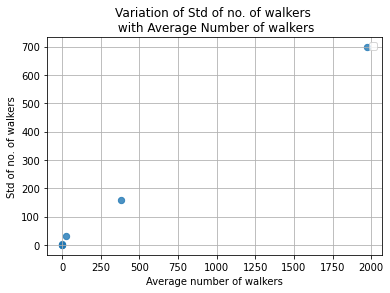

In [ ]:
xarr=Avg_walkers_only
yarr=Std_walkers_only
xlabel,ylabel,title="Average number of walkers","Std of no. of walkers","Variation of Std of no. of walkers \n with Average Number of walkers"
labels="Variation"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
#curve_fitting(xarr,yarr)

#Variation of $\sigma$ with $<w>$ computed for all nodes

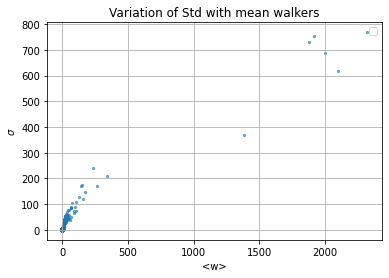

In [ ]:
xarr,yarr=np.array([dic_mean_walkers[i] for i in dic_mean_walkers]),np.array([dic_std_walkers[i] for i in dic_std_walkers])
xlabel,ylabel,title="<w>",r'$ \sigma $',"Variation of Std with mean walkers"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker=".")

#Extreme Event Probablity Computation and plotting

In [ ]:
Scaling_factor=2
threshold_dict,EEP_nodewise,EEP_degreewise=ExtremeEventProb(nodes,Nodes_with_Degree,Scaling_factor,TimeSeries,dic_mean_walkers,dic_std_walkers)

##Distribution of threshold values computed for all nodes

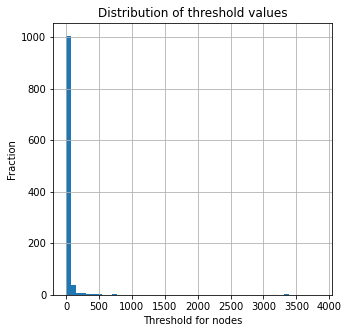

In [ ]:
threshold_values=np.array([threshold_dict[i] for i in threshold_dict])
bins=50
fsize=(5,5)
xlabel,ylabel,title="Threshold for nodes","Fraction","Distribution of threshold values"
HistoGram(threshold_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Probability of Extreme event values(computed for all nodes)

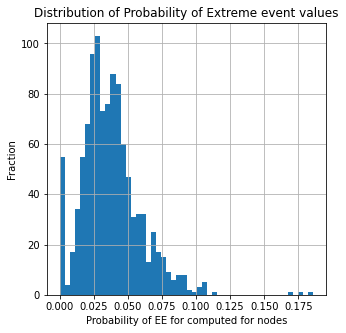

In [ ]:
ExtremeEventN_values=np.array([EEP_nodewise[i] for i in EEP_nodewise])
bins=50
xlabel,ylabel,title="Probability of EE for computed for nodes","Fraction","Distribution of Probability of Extreme event values"
HistoGram(ExtremeEventN_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Distribution of Probability of Extreme event values average over nodes of same degree

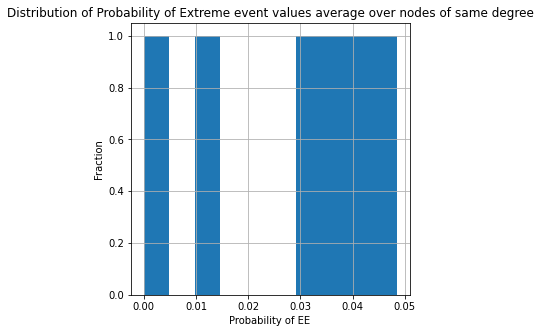

In [ ]:
ExtremeEventD_values=np.array([EEP_degreewise[i] for i in EEP_degreewise])
bins=10
xlabel,ylabel,title="Probability of EE ","Fraction","Distribution of Probability of Extreme event values average over nodes of same degree"
HistoGram(ExtremeEventD_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Variation of Probability of Occurrence of extreme event with degree of nodes
#walkers distributed randomly and nodes have finite cacacity
<figure>
<center>
<img src=""/>
<figcaption>Image Caption</figcaption></center>
<img src="/content/IMG_20220904_180333.jpg" alt="Smiley face" width="42" height="42" style="float:right"/>
</figure>
<table>   
  <tr>     
    <td><img src=alt="img"/>
    </td>   
    <td>Txt</td>   
  </tr>
</table>

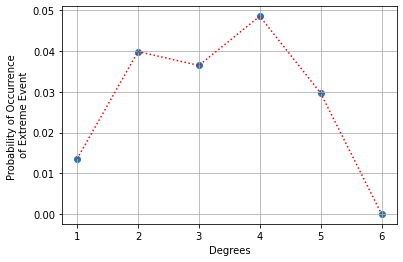

In [ ]:
extreme_eventP_degreewise=np.array([[j,EEP_degreewise[j]] for j in EEP_degreewise])
xarr,yarr=extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1]
plt.scatter(extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1])
plt.plot(extreme_eventP_degreewise[::,0],extreme_eventP_degreewise[::,1],color='r',ls=':')
plt.ylabel("Probability of Occurrence \n of Extreme Event")
plt.grid()
plt.xlabel("Degrees")
plt.savefig('my_plot.png')

In [ ]:
def Extreme_event_values_Dgreeewise(TimeSeries,Scaling_factor,Nodes_with_Degree):
  nodes=len(TimeSeries.keys())
  dic_mean_walkers ,dic_std_walkers=mean_std_walkers_nodewise(TimeSeries,nodes)
  Average_walk_degreewise,Std_walk_degreewise=walkers_statistic_degreewise(Nodes_with_Degree,dic_mean_walkers,dic_std_walkers)
  threshold_dict,EEP_nodewise,EEP_degreewise=ExtremeEventProb(nodes,Nodes_with_Degree,Scaling_factor,TimeSeries,dic_mean_walkers,dic_std_walkers)
  extreme_eventP_degreewise=np.array([[j,EEP_degreewise[j]] for j in EEP_degreewise])
  return dic_mean_walkers ,dic_std_walkers,extreme_eventP_degreewise

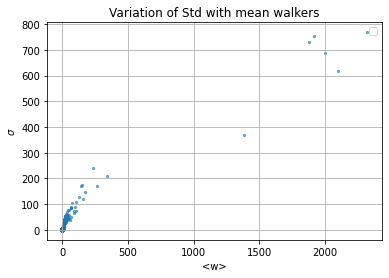

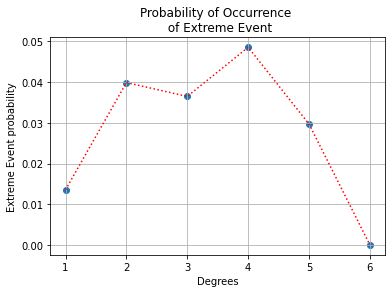

In [ ]:
file_name="/content/drive/MyDrive/MS_thesis_work/Interacting_walkers/I_DTRW_sig_0_alp_0_NodeCapcity_30_randDist_16394_walkers_1070_nodes_mumbai_graph_100000s"
TimeSeries=loadData(file_name)
dic_mean_walkers ,dic_std_walkers,EE=Extreme_event_values_Dgreeewise(TimeSeries,2,Nodes_with_Degree)
xarr,yarr=np.array([dic_mean_walkers[i] for i in dic_mean_walkers]),np.array([dic_std_walkers[i] for i in dic_std_walkers])
xlabel,ylabel,title="<w>",r'$ \sigma $',"Variation of Std with mean walkers"
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker=".")
plt.savefig('/content/drive/MyDrive/MS_thesis_work/Interacting_walkers/Avg_std_I_DTRW_sig_0_alp_0_NodeCapcity_30_randDist_16394_walkers_1070_nodes_mumbai_graph_100000s.png')
plt.show()
xarr,yarr=EE[::,0],EE[::,1]
plt.scatter(xarr,yarr)
plt.plot(xarr,yarr,color='r',ls=':')
plt.title("Probability of Occurrence \n of Extreme Event")
plt.grid()
plt.ylabel("Extreme Event probability")
plt.xlabel("Degrees")
plt.savefig('/content/drive/MyDrive/MS_thesis_work/Interacting_walkers/EE_I_DTRW_sig_0_alp_0_NodeCapcity_30_randDist_16394_walkers_1070_nodes_mumbai_graph_100000s.png')